# *CONVOLUTIONAL NEURAL NETWORK TRAINING FOR ALZHEIMER´S DISEASE *


ARTIFICIAL INTELLIGENCE


        BY:
 Paulina Carolina Cúpich Méndez     1909542

 Mónica Sodelva Cabrera López       1912094

 Nelly Jaqueline Jurado Rodríguez   1942520

 Álvaro Flores Martinez             1991812

 Mónica Damarys Gaytán Luna         1991958
 
 Leslie Sandoval Saldaña            1992207


En el presente codigo se utiliza el dataset de alzheimer propuesto para entrenar una red neuronal convolucional y validarla. Se crea una cuenta en kaggle para que se permita descargar la API del repositorio. 

### **OBTAINING IMAGES**

Se hace el nexo con Google Drive en donde previamente se creó una carpeta para el proyecto.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The corresponding library is imported to start downloading the repository from kaggle.

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Descargas_Kaggle'


The address is changed to Google Drive with the respective path.

In [3]:
%cd /content/gdrive/MyDrive/Descargas_Kaggle

/content/gdrive/MyDrive/Descargas_Kaggle


Check that the content of the folder in Drive is the file
.jason from kaggle.

In [4]:
!ls

kaggle.json


Dataset is downloaded.

In [5]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

 93% 353M/380M [00:01<00:00, 197MB/s]
100% 380M/380M [00:01<00:00, 207MB/s]


A folder is created in which the compressed Dataset will be saved.

In [6]:
!mkdir Augmented_Alzheimer
!mv augmented-alzheimer-mri-dataset.zip Augmented_Alzheimer

The change of direction is made.



In [7]:
%cd Augmented_Alzheimer/                      

/content/gdrive/MyDrive/Descargas_Kaggle/Augmented_Alzheimer



The folder is unzipped to release the files.

In [8]:
!unzip augmented-alzheimer-mri-dataset.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: OriginalDataset/NonDemented/31 (10).jpg  
  inflating: OriginalDataset/NonDemented/31 (100).jpg  
  inflating: OriginalDataset/NonDemented/31 (11).jpg  
  inflating: OriginalDataset/NonDemented/31 (12).jpg  
  inflating: OriginalDataset/NonDemented/31 (13).jpg  
  inflating: OriginalDataset/NonDemented/31 (14).jpg  
  inflating: OriginalDataset/NonDemented/31 (15).jpg  
  inflating: OriginalDataset/NonDemented/31 (16).jpg  
  inflating: OriginalDataset/NonDemented/31 (17).jpg  
  inflating: OriginalDataset/NonDemented/31 (18).jpg  
  inflating: OriginalDataset/NonDemented/31 (19).jpg  
  inflating: OriginalDataset/NonDemented/31 (2).jpg  
  inflating: OriginalDataset/NonDemented/31 (20).jpg  
  inflating: OriginalDataset/NonDemented/31 (21).jpg  
  inflating: OriginalDataset/NonDemented/31 (22).jpg  
  inflating: OriginalDataset/NonDemented/31 (23).jpg  
  inflating: OriginalDataset/NonDemented/31 (24).jpg 

### **PREPROCESSING**


The necessary libraries are imported.

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from matplotlib import pyplot
import cv2
from google.colab.patches import cv2_imshow
import glob
import numpy as np

Arrays are created and initialized to zero to then store the images and their tags within them.

In [10]:
labelMild=[]
labelModerate=[]
labelNon=[]
labelVeryMild=[]
array_MildD=[]
array_ModerateD=[]
array_NonD=[]
array_VMildD=[]
MRIR=[]

The folder containing the files (images) of each category are saved in the variable named array_*class* with the help of the cv2.imread command. At the same time they are put in gray scale in order to facilitate their analysis. Labels are also assigned so that the program can recognize which image corresponds to each category.
The number of elements contained in each array is printed, thus verifying that they have been saved correctly.


In [12]:
array_MildD=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/gdrive/MyDrive/Descargas_Kaggle/Augmented_Alzheimer/AugmentedAlzheimerDataset/MildDemented/*jpg")]
labelMild=["MildDemented" for file in array_MildD]

print(len(array_MildD))

array_ModerateD=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/gdrive/MyDrive/Descargas_Kaggle/Augmented_Alzheimer/AugmentedAlzheimerDataset/ModerateDemented/*jpg")]
labelModerate=["ModerateDemented" for file in array_ModerateD]

print(len(array_ModerateD))

array_NonD=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/gdrive/MyDrive/Descargas_Kaggle/Augmented_Alzheimer/AugmentedAlzheimerDataset/NonDemented/*jpg")]
labelNon=["NonDemented" for file in array_NonD]

print(len(array_NonD))

array_VMildD=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/gdrive/MyDrive/Descargas_Kaggle/Augmented_Alzheimer/AugmentedAlzheimerDataset/VeryMildDemented/*jpg")]
labelVeryMild=["VeryMildDemented" for file in array_VMildD]

print(len(array_VMildD))



8960
6464
9600
8960


All the previous variables are saved in a single one and the number of elements is printed to confirm the procedure. (One variable for labels and another for images).

In [13]:
MRI=array_VMildD+array_MildD+array_ModerateD+array_NonD
ETIQUETAS=labelMild+labelModerate+labelNon+labelVeryMild
print(len(MRI))
print(len(ETIQUETAS))

33984
33984


Image 0 of each category with its respective label is printed as proof.

Text(0.5, 0, 'ModerateDemented')

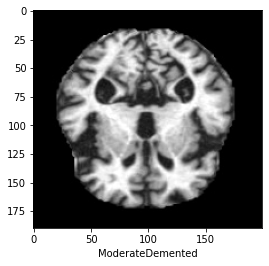

In [14]:
plt.imshow(array_ModerateD[0], cmap='gray')
plt.xlabel(labelModerate[0])



Text(0.5, 0, 'MildDemented')

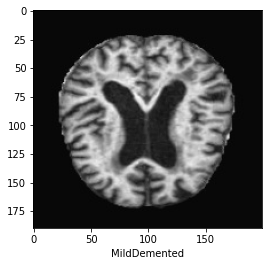

In [15]:
plt.imshow(array_MildD[0], cmap='gray')
plt.xlabel(labelMild[0])

Text(0.5, 0, 'NonDemented')

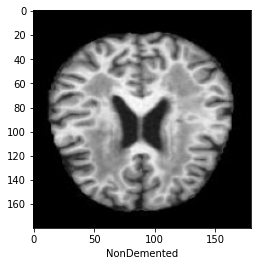

In [16]:
plt.imshow(array_NonD[0], cmap='gray')
plt.xlabel(labelNon[0])

Text(0.5, 0, 'VeryMildDemented')

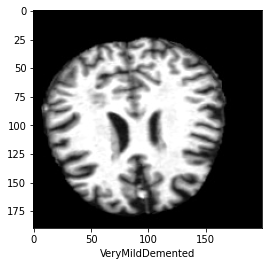

In [17]:


plt.imshow(array_VMildD[0], cmap='gray')
plt.xlabel(labelVeryMild[0])

The images are resized to 64x64 pixels and all the already modified images are stored in a new MRIR variable. The amount of stored data is checked.

In [18]:
MRIR=[cv2.resize(file, (64,64), interpolation=cv2.INTER_LINEAR)for file in MRI]
len(MRIR)

33984

The variables where the training and test data will be stored are created. They are initialized to zero.

In [33]:
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

A for cycle is carried out to divide the images into 80% training and 20% validation, with which the network will later be trained and validated.

In [34]:
i=0
j=0
for i in range(0,len(MRIR),33984):
  for j in range(27188):
    train_images.append(MRIR[i+j])
    train_labels.append(ETIQUETAS[i+j])     
    
  for j in range(6796):
    test_images.append(MRIR[i+27188+j])
    test_labels.append(ETIQUETAS[i+2717+j])

#convertir a float
train_images=np.array(train_images)
train_labels=np.array(train_labels)
test_images=np.array(test_images)
test_labels=np.array(test_labels)

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
test_labels=label.fit_transform(test_labels)
train_labels=label.fit_transform(train_labels)



Data stored within variables is normalized.

In [35]:
train_images=train_images/255.0
test_images=test_images/255.0

It verifies that the images have been stored correctly. It is verified by seeing that there are 33984 images of 64x64 pixels.

(33984, 64, 64)
(33984, 64, 64)
AxesImage(54,36;334.8x217.44)
Text(0.5, 0, '0')


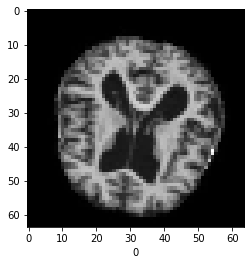

In [36]:
print(train_images.shape)
print(test_images.shape)
print(plt.imshow(test_images[10],cmap='gray'))
print(plt.xlabel(test_labels[10]))

### **TRAINING OF THE CNN**

The neural network is started with the code seen in class, using 4 layers with 'relu' activation. In the last layer of the classification part the activation is with softmax.

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [38]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))


The model is compiled and trained with 50 epochs.

In [39]:
# Compliación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(train_images, train_labels))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1062/1062 [==============================] - 9s 8ms/step - loss: 1.0794 - accuracy: 0.5080 - val_loss: 0.9087 - val_accuracy: 0.6133
Epoch 2/50
1062/1062 [==============================] - 10s 9ms/step - loss: 0.8456 - accuracy: 0.6402 - val_loss: 0.7476 - val_accuracy: 0.6933
Epoch 3/50
1062/1062 [==============================] - 8s 7ms/step - loss: 0.7291 - accuracy: 0.6999 - val_loss: 0.6698 - val_accuracy: 0.7215
Epoch 4/50
1062/1062 [==============================] - 7s 7ms/step - loss: 0.6417 - accuracy: 0.7426 - val_loss: 0.6202 - val_accuracy: 0.7566
Epoch 5/50
1062/1062 [==============================] - 7s 7ms/step - loss: 0.5782 - accuracy: 0.7716 - val_loss: 0.5187 - val_accuracy: 0.7990
Epoch 6/50
1062/1062 [==============================] - 7s 7ms/step - loss: 0.5293 - accuracy: 0.7907 - val_loss: 0.4624 - val_accuracy: 0.8187
Epoch 7/50
1062/1062 [==============================] - 7s 7ms/step - loss: 0.4878 - accuracy: 0.8082 - val_loss: 0.4540 - val_accuracy: 0.8236
Ep

### **PLOT OF TRAINING ACCURACY VS VALIDATION ACCURACY**


Training accuracy is plotted against validation accuracy to check that the network is working correctly.

1062/1062 - 4s - loss: 0.1758 - accuracy: 0.9294 - 4s/epoch - 4ms/step
0.9294373989105225


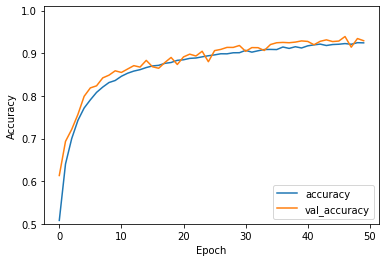

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

### **PREDICTIONS**


10 tests are carried out.

1062/1062 [==============================] - 3s 3ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
1

La imagen pertenece a la categoria:
1

Text(0.5, 0, 'ModerateDemented')


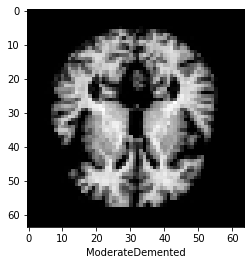

In [45]:
#PREDICTION 1: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[13000]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[13000])
print('')
plt.imshow(test_images[8000], cmap='gray')
print(plt.xlabel(ETIQUETAS[13000]))

1062/1062 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
2

La imagen pertenece a la categoria:
2

Text(0.5, 0, 'NonDemented')


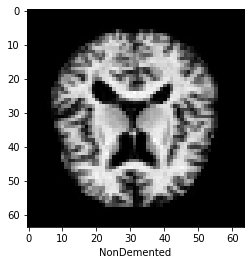

In [46]:
#PREDICTION 2: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[24000]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[24000])
print('')
plt.imshow(test_images[24000], cmap='gray')
print(plt.xlabel(ETIQUETAS[24000]))

1062/1062 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
0

La imagen pertenece a la categoria:
0

Text(0.5, 0, 'MildDemented')


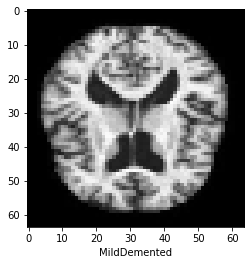

In [43]:
#PREDICTION 3: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[1100]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[1100])
print('')
plt.imshow(test_images[1100], cmap='gray')
print(plt.xlabel(ETIQUETAS[1100]))

850/850 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
3

La imagen pertenece a la categoria:
3

Text(0.5, 0, 'VeryMildDemented')


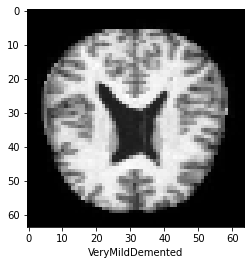

In [ ]:
#PREDICTION 4: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[2700]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[2700])
print('')
plt.imshow(test_images[2700], cmap='gray')
print(plt.xlabel(ETIQUETAS[2700]))

850/850 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
0

La imagen pertenece a la categoria:
0

Text(0.5, 0, 'MildDemented')


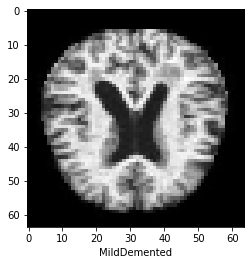

In [ ]:
#PREDICTION 5: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[700]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[700])
print('')
plt.imshow(test_images[700], cmap='gray')
print(plt.xlabel(ETIQUETAS[700]))

850/850 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
1

La imagen pertenece a la categoria:
1

Text(0.5, 0, 'ModerateDemented')


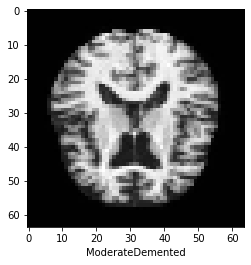

In [ ]:
#PREDICTION 6: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[1300]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[1300])
print('')
plt.imshow(test_images[1300], cmap='gray')
print(plt.xlabel(ETIQUETAS[1300]))

850/850 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
2

La imagen pertenece a la categoria:
2

Text(0.5, 0, 'NonDemented')


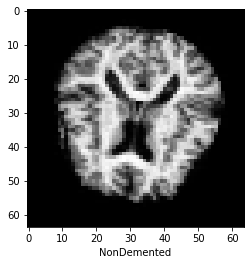

In [ ]:
#PREDICTION 7: CORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[1684]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[1684])
print('')
plt.imshow(test_images[1684], cmap='gray')
print(plt.xlabel(ETIQUETAS[1684]))

850/850 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
0

La imagen pertenece a la categoria:
0

Text(0.5, 0, 'MildDemented')


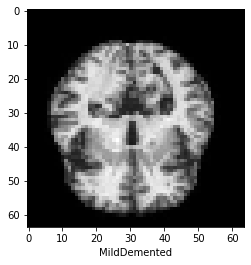

In [ ]:
#PREDICTION 8: CORRECT
predictions = model.predict(train_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[33]))
print('')
print('La imagen pertenece a la categoria:')
print(train_labels[33])
print('')
plt.imshow(train_images[33], cmap='gray')
print(plt.xlabel(ETIQUETAS[33]))

850/850 [==============================] - 2s 2ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
2

La imagen pertenece a la categoria:
1

Text(0.5, 0, 'ModerateDemented')


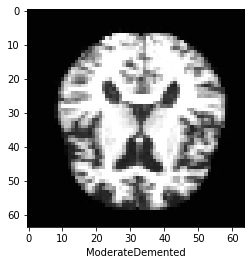

In [ ]:
#PREDICTION 9: INCORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[1450]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[1450])
print('')
plt.imshow(test_images[1450], cmap='gray')
print(plt.xlabel(ETIQUETAS[1450]))

213/213 [==============================] - 1s 3ms/step

0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented

El programa predice que la imagen pertenece a la categoria:
2

La imagen pertenece a la categoria:
0

Text(0.5, 0, 'MildDemented')


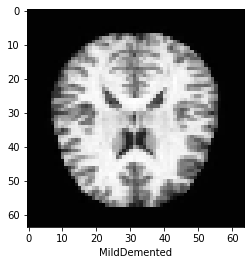

In [ ]:
#PREDICTION 10: INCORRECT
predictions = model.predict(test_images)

print('')
print('0 = MildDemented, 1 = ModerateDemented , 2 = NonDemented, 3 = VeryMildDemented')
print('')
print('El programa predice que la imagen pertenece a la categoria:')
print(np.argmax(predictions[2600]))
print('')
print('La imagen pertenece a la categoria:')
print(test_labels[2600])
print('')
plt.imshow(test_images[2600], cmap='gray')
print(plt.xlabel(ETIQUETAS[2600]))